<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/master/TestAndTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [0]:
#!pip3 install 'tqdm'
import os
import logging
import sys


In [0]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

# Import packages

In [0]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR import ResNet
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import Subset, DataLoader

# Hyper-Parameters

In [0]:
DEVICE = 'cuda' # 'cuda' or 'cpu'
BATCH_SIZE = 128
NUM_WORKERS = 100
TASK_SIZE = 10
NUM_EPOCHS = 70
WEIGHT_DECAY = 0.00001
LR = 2
STEP_SIZE = [49,63]
GAMMA = 1/5

# Define Network

In [0]:
resNet = ResNet.resnet32(num_classes=100)
resNet = resNet.to(DEVICE)

In [0]:
resnet_transformer = transforms.Compose([transforms.Resize(32), 
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizes tensor with mean and standard deviation
])


# Define DataSets

In [0]:
trainDS = Dataset(train=True, transform = resnet_transformer)
testDS = Dataset(train=False, transform = resnet_transformer)

Files already downloaded and verified
Files already downloaded and verified


# Useful plots

The function plotEpoch plots, at the end of each task, how accuracy and loss change during the training phase. It show

*   Validation and Training Accuracy
*   Validation and Training Loss

The function plotTask, for each task, how the accuracy on the validation set change when adding new tasks


In [0]:
def plotEpoch(pars):
  import numpy as np
  import matplotlib.pyplot as plt

  x_epochs = np.linspace(1,NUM_EPOCHS,NUM_EPOCHS)
  y1 = [e[0] for e in pars] #val acuracy
  y2 = [e[2] for e in pars] #train accuracy
  plt.plot(x_epochs, y1 , '-', color='red')
  plt.plot(x_epochs, y2, '-', color='blue')
  plt.xlabel("Epoch")
  plt.legend(['Validation Accuracy', 'Train accuracy'])
  plt.show()

  y1 = [e[1] for e in pars] #val loss
  y2 = [e[3] for e in pars] #train loss
  plt.plot(x_epochs, y1 , '-', color='red')
  plt.plot(x_epochs, y2, '-', color='blue')
  plt.xlabel("Epoch")
  plt.legend(['Validation Loss', 'Train Loss'])
  plt.show()



In [0]:
def plotTask():
  import numpy as np
  import matplotlib.pyplot as plt

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, y1 ,'b', label='Accuracy')
  plt.xlabel("Epoch")
  plt.title('Accuracy over classes')
  plt.legend(['Validation Accuracy'])
  plt.grid(True)
  plt.show()



# Train and evaluation phase

In [0]:
def eachepochevaluation():
  resNet.train(False) # Set Network to evaluation mode
  running_corrects = 0
  #confusion_matrix = torch.zeros(10, 10)
  for images, labels in test_loader:
    images = images.float().to(DEVICE)
    labels = labels.to(DEVICE)
    onehot_labels = torch.eye(100)[labels].to(DEVICE) #it creates the one-hot-encoding list for the labels; neede for BCELoss
    # Forward Pass
    outputs = resNet(images)
    # Get predictions
    _, preds = torch.max(outputs.data, 1)
    # Update Corrects
    running_corrects += torch.sum(preds == labels.data).data.item()

  # Calculate Accuracy
  accuracy = running_corrects / float(len(test_dataset))
  
  #Calculate Loss
  loss = criterion(outputs,onehot_labels)
  print("epoch =" + str(epoch))
  print('Validation Loss: {} Validation Accuracy : {}'.format(loss,accuracy))
  return (accuracy, loss.item())

Task classes 0 to 10
[2.0]     [2.0]


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:396: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


At step  0  and at epoch =  0  the loss is =  0.03781043365597725  and accuracy is =  0.145
epoch =0
Validation Loss: 0.03864850476384163 Validation Accuracy : 0.141
[2.0]     [2.0]
At step  0  and at epoch =  1  the loss is =  0.03831131011247635  and accuracy is =  0.1508
epoch =1
Validation Loss: 0.044875312596559525 Validation Accuracy : 0.111
[2.0]     [2.0]
At step  0  and at epoch =  2  the loss is =  0.03208746761083603  and accuracy is =  0.1616
epoch =2
Validation Loss: 0.03861377388238907 Validation Accuracy : 0.122
[2.0]     [2.0]
At step  0  and at epoch =  3  the loss is =  0.03097987174987793  and accuracy is =  0.1992
epoch =3
Validation Loss: 0.034681204706430435 Validation Accuracy : 0.166
[2.0]     [2.0]
At step  0  and at epoch =  4  the loss is =  0.027154667302966118  and accuracy is =  0.2474
epoch =4
Validation Loss: 0.03817727789282799 Validation Accuracy : 0.123
[2.0]     [2.0]
At step  0  and at epoch =  5  the loss is =  0.02797466702759266  and accuracy is 

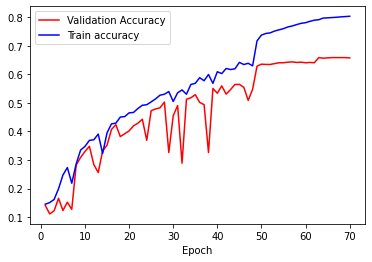

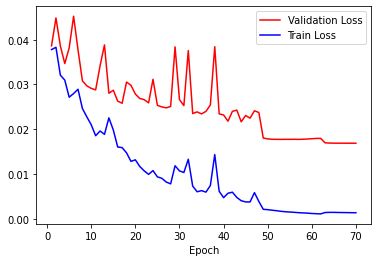

Task classes 10 to 20
[2.0]     [2.0]


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:396: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


At step  10  and at epoch =  0  the loss is =  0.03422103449702263  and accuracy is =  0.161
epoch =0
Validation Loss: 0.03141219541430473 Validation Accuracy : 0.1025
[2.0]     [2.0]
At step  10  and at epoch =  1  the loss is =  0.03220921382308006  and accuracy is =  0.2748
epoch =1
Validation Loss: 0.03879709914326668 Validation Accuracy : 0.073
[2.0]     [2.0]
At step  10  and at epoch =  2  the loss is =  0.02407338097691536  and accuracy is =  0.2862
epoch =2
Validation Loss: 0.03879100829362869 Validation Accuracy : 0.0905
[2.0]     [2.0]
At step  10  and at epoch =  3  the loss is =  0.024298926815390587  and accuracy is =  0.319
epoch =3
Validation Loss: 0.04091411828994751 Validation Accuracy : 0.0925
[2.0]     [2.0]
At step  10  and at epoch =  4  the loss is =  0.0199564378708601  and accuracy is =  0.371
epoch =4
Validation Loss: 0.032054588198661804 Validation Accuracy : 0.1305
[2.0]     [2.0]
At step  10  and at epoch =  5  the loss is =  0.018227113410830498  and accur

In [0]:
pars_epoch = []
pars_tasks = []
test_indexes = []

for task in range(0, 100, TASK_SIZE):
  pars_tasks.insert(task, 0)

for task in range(0, 100, TASK_SIZE):

  #Define the parameters for traininig:
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(resNet.parameters(), lr=2., weight_decay=WEIGHT_DECAY)
  scheduler = optim.lr_scheduler.MultiStepLR(optimizer, STEP_SIZE, gamma=GAMMA) #allow to change the LR at predefined epochs

  n_classes = task + TASK_SIZE

  resNet.train(True)

  print("Task classes {} to {}".format(task, n_classes))

  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes)
  test_dataset = Subset(testDS, test_indexes)

  train_loader = DataLoader( train_dataset, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE)
  test_loader = DataLoader( test_dataset, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE )

  current_step = 0
  
  ##Train phase
  for epoch in range(NUM_EPOCHS):
    scheduler.step() #update the learning rate
    print(scheduler.get_lr(), "   ", scheduler.get_last_lr()) #check if the lr is okay
    running_corrects = 0
    for images, labels in train_loader:
      
      # Bring data over the device of choice
      images = images.float().to(DEVICE)
      labels = labels.to(DEVICE)

      onehot_labels = torch.eye(100)[labels].to(DEVICE)#it creates the one-hot-encoding list for the labels; neede for BCELoss

      optimizer.zero_grad() # Zero-ing the gradients

      # Forward pass to the network
      outputs = resNet(images)
      
      #loss = criterion(outputs,labels)
      loss = criterion(outputs,onehot_labels)

      # Get predictions
      _, preds = torch.max(outputs.data, 1)
      
      # Update Corrects
      running_corrects += torch.sum(preds == labels.data).data.item()
      
      loss.backward()  # backward pass: computes gradients
      optimizer.step() # update weights based on accumulated gradients

      current_step += 1
    # Calculate Accuracy
    accuracy = running_corrects / float(len(train_dataset))
    print("At step ", str(task), " and at epoch = ", epoch, " the loss is = ", loss.item(), " and accuracy is = ", accuracy)

    #Some variables useful for visualization

    param=eachepochevaluation() #run the network in the validation set, it returns validation accuracy and loss 

    pars_epoch.append( (param[0], param[1], accuracy, loss.item()) )
    #pars_epoch -->   val_acc,  val_loss, train_acc,train_loss
    pars_tasks[int(task/10)] += param[0] # 
    #pars_task[task/10] --> contains the sum of all the accuracies obtained in a specific task

  plotEpoch(pars_epoch) 
  pars_epoch = [] #clean the pars_epoch after visualizations
  pars_tasks[int(task/10)] /= NUM_EPOCHS #make the average sum(accuracy)/num_epochs

plotTask(pars_tasks)